#Spotify Controling Trends?


Nolan Enright

In [64]:
import matplotlib.pyplot as plt       
import seaborn as sns      
import numpy as np
import pandas as pd

## 1. Introduction

I have always used Spotify as my own streaming music service for as long as I can remember. Upon using Spotify, you can immediately tell their approach to discography is through the creation of playlists many of which are created by Spotify's algorithm. This creates the notion that these playlists have a lot of influence on the popularity of the tracks. Perhaps even making them popular whereas they would not be without it. I pose the question, how does the nature of the relationship between the number of Spotify playlists the song is included in and the total streams change for different values of the key in the dataset? The motivation behind this comes from an more broad question that is, do the streaming services control the music industry? Does the key have anything to do with song popularity? I think people who want to see if their music taste is being generated artifically would be intrigued by my research question moreover if certian keys are being over represented in popular music. Thus they could use my answers to alter their listening, perhaps move away from the premeditated Spotify playlists.

## 2. Dataset Discussion

In [65]:
df = pd.read_csv("spotify_2023.csv", encoding="ISO-8859-1")
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [66]:
df.shape[0]

953

This dataset presents a collection of the most streamed songs on Spotify in the year 2023. Each row in the dataset represents an individual track, while the columns represent track name, artist(s) name, artist count, released year, released month, released day, times in Spotify playlists, times in Spotify charts, total streams, times in Apple playlists, times in Apple charts,  times in Deezer playlists, times in Deezer charts, times in Shazam charts, bpm, key, mode, danceability, valence, energy, acousticness, instrumentalness, liveness, speechiness. This dataset was compiled using data retrieved from Spotify's Web API, ensuring accuracy. No data should be left out, however, when examining my research question, some tracks can be left out due to no playlist presence.  The three variables that will be tested are, in_spotify_playlists, key, and streams. These represent, the number of Spotify playlists the song is included in, the key the track is in, and the total number of streams on Spotify respectfully.

This dataset is from Kaggle.com.
Link: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023
Downloaded Wed. September 20th 2023

## 3. Dataset Cleaning

In [67]:
df = df[["in_spotify_playlists", "key", "streams"]]
df

,in_spotify_playlists,key,streams
0,553,B,141381703
1,1474,C#,133716286
2,1397,F,140003974
3,7858,A,800840817
4,3133,A,303236322
...,...,...,...
948,953,A,91473363
949,1180,F#,121871870
950,573,C#,73513683
951,1320,C#,133895612


In [68]:
df.isnull().sum()


in_spotify_playlists     0
key                     95
streams                  0
dtype: int64

There are 95 explicit missing values for our testing variables.

In [69]:
df_implict = df
df_implict.replace(0, np.nan, inplace=True)
df_implict.replace('', np.nan, inplace=True)
df_implict.isna().sum()

in_spotify_playlists     0
key                     95
streams                  0
dtype: int64

There are no implict missing values in our test variables

In [70]:
df_cleaned= df_implict.dropna()

In [71]:
df_cleaned.shape[0]

858

Dropped 95 rows.

The pros of this cleaning technique is that it makes sure any missing values that werent collected are accounted for and they dont mess with our findings. The cons is that songs maybe named nothing, yes it is a very far fetched possibility but could happen or maybe the song is called 0 or the song is not present in any playlists but is a top song. In this case all teh drops were in the key category so unfortuntely some songs will not be represented.

In [72]:
df_cleaned['streams'] = pd.to_numeric(df_cleaned['streams'], errors='coerce')
df_cleaned

/var/folders/9w/4bhm6y311mxccw3ds9zfltn80000gn/T/ipykernel_56431/2645282922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['streams'] = pd.to_numeric(df_cleaned['streams'], errors='coerce')


,in_spotify_playlists,key,streams
0,553,B,141381703.0
1,1474,C#,133716286.0
2,1397,F,140003974.0
3,7858,A,800840817.0
4,3133,A,303236322.0
...,...,...,...
948,953,A,91473363.0
949,1180,F#,121871870.0
950,573,C#,73513683.0
951,1320,C#,133895612.0


Had to convert streams column due to typeerrors

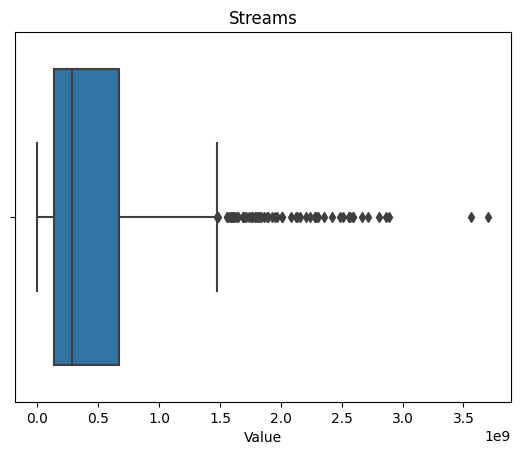

In [73]:

sns.boxplot(x='streams', data=df_cleaned)
plt.title('Streams')
plt.xlabel('Value')
plt.show()

/var/folders/9w/4bhm6y311mxccw3ds9zfltn80000gn/T/ipykernel_56431/2788155025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['streams'] = pd.to_numeric(df_cleaned['streams'])


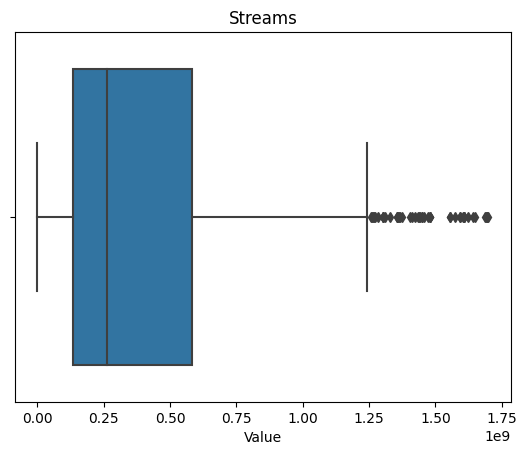

In [74]:
df_cleaned = df_cleaned[df_cleaned['streams'] < 1700000000]
df_cleaned['streams'] = pd.to_numeric(df_cleaned['streams'])

sns.boxplot(x='streams', data=df_cleaned)
plt.title('Streams')
plt.xlabel('Value')
plt.show()

In [75]:
df_cleaned.shape[0]

810

Dropped 48 more rows.

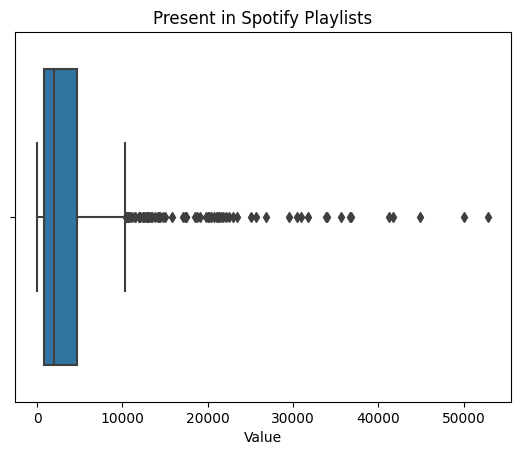

In [76]:

sns.boxplot(x='in_spotify_playlists', data=df_cleaned)
plt.title('Present in Spotify Playlists')
plt.xlabel('Value')
plt.show()

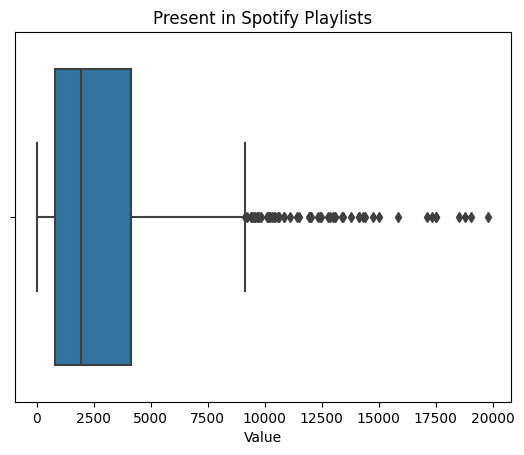

In [77]:
df_cleaned = df_cleaned[df_cleaned['in_spotify_playlists'] < 20000]
df_cleaned['in_spotify_playlists'] = pd.to_numeric(df_cleaned['in_spotify_playlists'])
sns.boxplot(x='in_spotify_playlists', data=df_cleaned)
plt.title('Present in Spotify Playlists')
plt.xlabel('Value')
plt.show()

In [78]:
df_cleaned.shape[0]

779

Dropped 31 more rows.

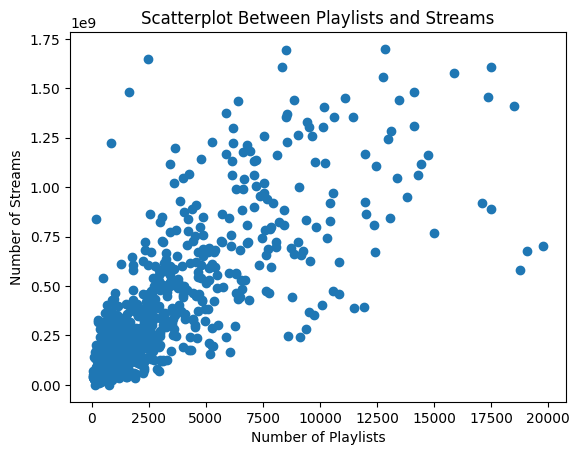

In [79]:
plt.scatter(df_cleaned['in_spotify_playlists'], df_cleaned['streams'])
plt.title('Scatterplot Between Playlists and Streams')
plt.xlabel('Number of Playlists')
plt.ylabel('Number of Streams')
plt.show()

In [80]:
df_cleaned = df_cleaned[df_cleaned['in_spotify_playlists'] < 7500]
df_cleaned = df_cleaned[df_cleaned['streams'] < 750000000]

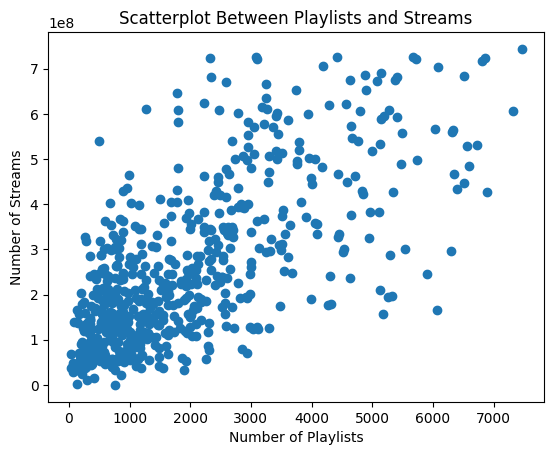

In [81]:
plt.scatter(df_cleaned['in_spotify_playlists'], df_cleaned['streams'])
plt.title('Scatterplot Between Playlists and Streams')
plt.xlabel('Number of Playlists')
plt.ylabel('Number of Streams')
plt.show()

In [82]:
df_cleaned.shape[0]

639

140 additional rows dropped

## 4. <u>Research Question</u>: How does the Relationship between `the number of Spotify playlists the song is included in` and `total number of streams` Change based on Different Values of `the key` in the Dataset?

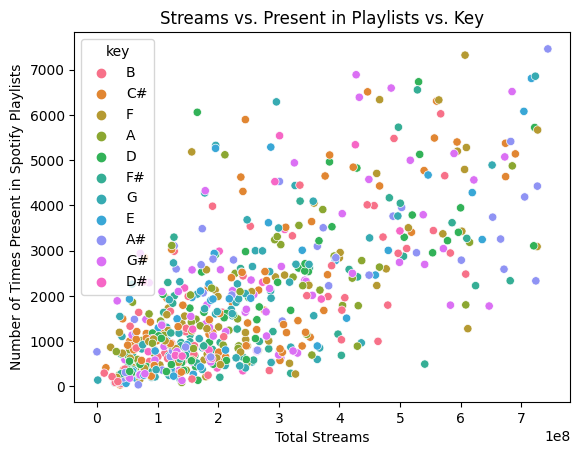

In [83]:
sns.scatterplot(x='streams', y='in_spotify_playlists', hue='key', data=df_cleaned)
plt.title('Streams vs. Present in Playlists vs. Key')
plt.xlabel("Total Streams")
plt.ylabel('Number of Times Present in Spotify Playlists')
plt.show()

This plot shows the Total Streams vs. Number of times present in spotify playlists, the colors correspond to different keys. This is a little hard to read and determine if there is a relationship.

In [84]:

sharp_keys = ['C#', 'F#', 'D#', 'A#', 'G#']

sharp_keys_mask = df_cleaned['key'].isin(sharp_keys)

sharp_keys_df = df_cleaned[sharp_keys_mask]
sharp_keys_df

,in_spotify_playlists,key,streams
1,1474,C#,133716286.0
5,2186,C#,183706234.0
8,1096,C#,95217315.0
10,2876,F#,505671438.0
21,516,F#,52135248.0
...,...,...,...
931,1545,G#,154863153.0
937,1794,C#,141720999.0
949,1180,F#,121871870.0
950,573,C#,73513683.0


Seperating the keys by sharpness should give a better plot we can read. 

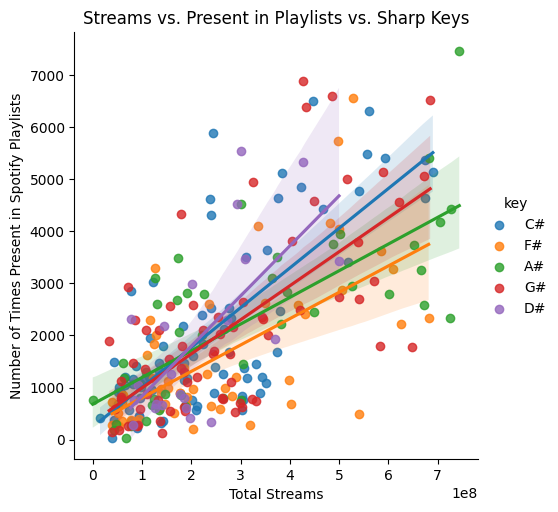

In [85]:
sns.lmplot(x='streams', y='in_spotify_playlists', hue='key', data=sharp_keys_df)
plt.title('Streams vs. Present in Playlists vs. Sharp Keys')
plt.xlabel("Total Streams")
plt.ylabel('Number of Times Present in Spotify Playlists')
plt.show()

Plot looks much better, used plot that incorporates line of best fit so relationships can be seen more clearly.

In [86]:

normal_keys = ['B', 'F', 'A', 'G', 'D']

normal_keys_mask = df_cleaned['key'].isin(normal_keys)

normal_keys_df = df_cleaned[normal_keys_mask]

Same process for the normal keys.

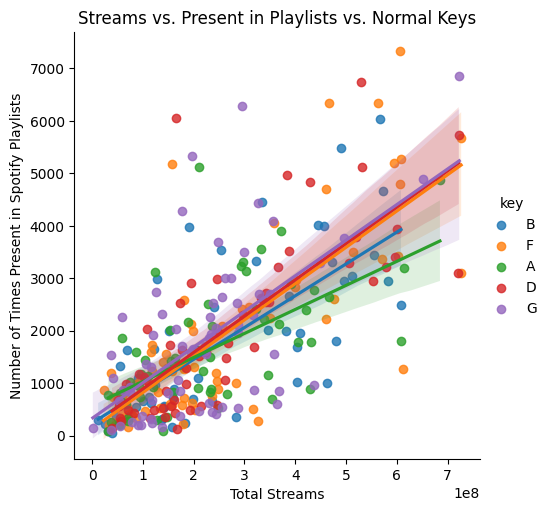

In [87]:
sns.lmplot(x='streams', y='in_spotify_playlists', hue='key', data=normal_keys_df)
plt.title('Streams vs. Present in Playlists vs. Normal Keys')
plt.xlabel("Total Streams")
plt.ylabel('Number of Times Present in Spotify Playlists')
plt.show()



In [88]:
import statsmodels.formula.api as smf
model_1 = smf.ols(formula="streams~in_spotify_playlists+C(key)", data=df_cleaned).fit()

In [89]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     58.26
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           2.15e-88
Time:                        14:55:59   Log-Likelihood:                -12810.
No. Observations:                 639   AIC:                         2.564e+04
Df Residuals:                     627   BIC:                         2.570e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.018e+08   1.69e+07      6.004      0.000    6.85e+07    1.35e+08
C(key)[T.A#]          2.937e+07   2.47e+07      1.190      0.234   -1.91e+07    7.78e+07
C(key)[T.B]           7.446e+06   2.26e+07      0.329      0.742   -3.69e+07    5.18e+07
C(key)[T.C#]         -2.614e+07   2.13e+07     -1.230      0.219   -6.79e+07    1.56e+07
C(key)[T.D]           3.154e+06   2.29e+07      0.138      0.891   -4.18e+07    4.81e+07
C(key)[T.D#]         -3.837e+07   3.11e+07     -1.235      0.217   -9.94e+07    2.26e+07
C(key)[T.E]          -1.279e+07   2.49e+07     -0.513      0.608   -6.18e+07    3.62e+07
C(key)[T.F]           5.219e+06    2.2e+07      0.237      0.813   -3.81e+07    4.85e+07
C(key)[T.F#]          2.711e+07   2.33e+07      1.164      0.245   -1.86e+07    7.28e+07
C(key)[T.G]          -2.454e+07   2.19e+07     -1.121      0.263   -6.75e+07    1.85e+07
C(key)[T.G#]          1.896e+06   2.19e+07      0.087      0.931    -4.1e+07    4.48e+07
in_spotify_playlists  7.793e+04   3130.112     24.896      0.000    7.18e+04    8.41e+04
==============================================================================
Omnibus:                       33.435   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.049
Skew:                           0.508   Prob(JB):                     2.01e-09
Kurtosis:                       3.688   Cond. No.                     2.82e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.82e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This regression model contains all the keys as a whole note that corrleation coeffecient squared is 0.505.

In [90]:
model_sharp = smf.ols(formula="streams~in_spotify_playlists+C(key)", data=sharp_keys_df).fit()
model_sharp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     52.21
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           9.17e-38
Time:                        14:55:59   Log-Likelihood:                -5545.3
No. Observations:                 276   AIC:                         1.110e+04
Df Residuals:                     270   BIC:                         1.112e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              1.34e+08   2.23e+07      6.018      0.000    9.02e+07    1.78e+08
C(key)[T.C#]          -5.58e+07   2.42e+07     -2.310      0.022   -1.03e+08   -8.24e+06
C(key)[T.D#]         -6.816e+07   3.39e+07     -2.012      0.045   -1.35e+08   -1.46e+06
C(key)[T.F#]         -3.141e+06   2.64e+07     -0.119      0.905    -5.5e+07    4.88e+07
C(key)[T.G#]         -2.771e+07   2.47e+07     -1.120      0.264   -7.64e+07     2.1e+07
in_spotify_playlists  7.665e+04   4858.025     15.778      0.000    6.71e+04    8.62e+04
==============================================================================
Omnibus:                       16.429   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.609
Skew:                           0.593   Prob(JB):                     0.000150
Kurtosis:                       3.354   Cond. No.                     1.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model isolates the sharps, notice the R-squared is a tad lower.

In [91]:
model_normal = smf.ols(formula="streams~in_spotify_playlists+C(key)", data=normal_keys_df).fit()
model_normal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                streams   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     63.23
Date:                Thu, 21 Sep 2023   Prob (F-statistic):           1.72e-45
Time:                        14:55:59   Log-Likelihood:                -6404.5
No. Observations:                 320   AIC:                         1.282e+04
Df Residuals:                     314   BIC:                         1.284e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.012e+08   1.72e+07      5.878      0.000    6.73e+07    1.35e+08
C(key)[T.B]           7.411e+06   2.19e+07      0.339      0.735   -3.56e+07    5.04e+07
C(key)[T.D]            3.01e+06   2.22e+07      0.136      0.892   -4.07e+07    4.67e+07
C(key)[T.F]            5.12e+06   2.13e+07      0.240      0.811   -3.69e+07    4.71e+07
C(key)[T.G]          -2.462e+07   2.12e+07     -1.162      0.246   -6.63e+07    1.71e+07
in_spotify_playlists  7.829e+04   4443.996     17.617      0.000    6.95e+04     8.7e+04
==============================================================================
Omnibus:                       19.093   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.850
Skew:                           0.458   Prob(JB):                     2.44e-06
Kurtosis:                       4.049   Cond. No.                     1.32e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This model isolates the normals, notice the R-squared is a little higher.

In [93]:

corrs=df_cleaned[['streams','in_spotify_playlists','key']].groupby(['key']).corr()
corrs

streams  in_spotify_playlists
key                                                     
A   streams               1.000000              0.609006
    in_spotify_playlists  0.609006              1.000000
A#  streams               1.000000              0.744429
    in_spotify_playlists  0.744429              1.000000
B   streams               1.000000              0.731184
    in_spotify_playlists  0.731184              1.000000
C#  streams               1.000000              0.750479
    in_spotify_playlists  0.750479              1.000000
D   streams               1.000000              0.755966
    in_spotify_playlists  0.755966              1.000000
D#  streams               1.000000              0.674814
    in_spotify_playlists  0.674814              1.000000
E   streams               1.000000              0.778213
    in_spotify_playlists  0.778213              1.000000
F   streams               1.000000              0.769346
    in_spotify_playlists  0.769346              1.000000
F#  streams               1.000000              0.632667
    in_spotify_playlists  0.632667              1.000000
G   streams               1.000000              0.610652
    in_spotify_playlists  0.610652              1.000000
G#  streams               1.000000              0.676451
    in_spotify_playlists  0.676451              1.000000

1. Comparing Direction: The relationship between streams and number of playlists for all keys is positive.
2. Comparing Shape: The relationship between streams and number of playlists for all keys is linear.
3. Comparing Strength: The strength of the relationship between streams and playlists for
all the keys is relatively strong. The songs in the key of E have a higher
strength with a correlation of 0.778 compaired with the rest at various correlations.
4. Comparing Outliers: After clean up, the outliers that are present are not extreme enough on one variable to significantly affect the dataset.
5. Comparing Slope: The relationship between streams and playlists for all the normal keys is slightly steeper than the sharper keys.

## 5. Conclusion

In conclusion, I have found that there is a relationship between number of tracks present in Spotify playlist and total streams based on the key to the song.  Moreover, upon studying the data set further I learned that 11 keys are represented. Now knowing this, I blocked the data set into two groups one featuring the sharp keys and the other with the normal keys.
I have found that normal keys tend to show a more uniform linear relationship for each key and higher correlation coefficient among the two. However, it appears that the sharper keys are trending higher slopes indicating a more significant relationship between streams and playlists. Interesting enough the summary statistics when both groups are fit into a model refute my conclusions on the sharper keys.  The R^2 of 0.505 normal and 0.492 sharps provides explanations for the uniform linearity on the normal keys. However, when studying the coefficients of the shaper keys, most have negative values indicating a negative slope that vastly differs from my visualization. Thus, as keys change the relationship between streams and playlists changes. 

I was no stranger to pitfalls and challenges in my programming. Specifically, the data clean-up process was tedious. First problem I encountered was a problem with the encoding of the dataset as it was downloaded. I had a utf-8 error that was fixed by adding some encoding parameter. Next, I had a frustrating problem with the creation of my boxplots. This data has the values of streams in a series type and not a double or integer. Thus, python and seaborn refused to attempt to create the boxplot. The error was ambiguous and suggested I use the bitwise_xor or the ‘^’ operator. After doing extensive research and debugging, I was able to use pd.tonumeric to solve this issue. This also permitted me to drop significant outliers. Another annoyance was the fact that the streams were to the 9th significant figure which was hard to work with and caused some accessibility issues in the visualizations. I could see this confusing the observer into thinking that the streams are in the wrong units or not the actual number. Thus, resulting in the audience thinking there is not a significant enough relationship to answer the research question or not representative of the whole. In future work, I strive to find better ways I can clean up the data. Specifically in determining the outliers. I spent a lot of time debating what should be dropped and what should be kept. I feel that I had enough to prove the relationship and answer the question. However the visualizations could look more cleaner and show a better correlation. 
